In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import scipy.integrate as integrate

In [3]:
# b = 2, a =-4
a = -4.
b = 2.

In [4]:
n = 20
X = []
Y = []
# Формируем однородную непрерывную случайную величину.
random_variable = sts.uniform()
# Генерируем случайные числа
xi = random_variable.rvs(size=n)
# X_i = e_i(b - a) + a
for i in range(n):
    x = xi[i] * (b - a) + a
    X.append(x)
    if x < 0:
        y = - (abs(x))**(1/3)
    else:
        y = x**(1/3)
    Y.append(y)
print(Y)

[-1.3141086979413494, -1.3971590607863607, -1.553221052869589, -1.0703570518148384, -1.3942492331837568, 1.079652653450905, -1.029366382043615, -0.9456700528239657, -1.5608244902772943, -0.8787707875103178, -0.564265803772882, -1.5555142459476896, 0.36463335254596474, -1.2297925824099794, -1.3808455370424677, -1.5060862535522395, -1.5598389746627348, 0.7430183851351712, -1.0796674594352536, 1.0804640627250695]


 1)Найдем точечную оценку математического ожидания случайной величины:

In [5]:
MO = sum(Y) / n
print("M = ", MO)

M =  -0.837598460610861


 2)Найдем точечную оценку дисперсии случайной величины:

In [6]:
Disp = 0.
for i in Y:
    Disp += (i - MO) ** 2
Disp = Disp / (n - 1)
print("D = ", Disp)

D =  0.8081161373750171


3)Найдем доверительный интервал для оценки математического ожидания случайной величины для различных уровней значимости:

Уровни значимости $\gamma$ примем равными $0.9$, $0.95$, $0.99$

Получаем n-1=19 степеней свободы. Тогда из таблице имеем: $t_{0.9, 19}=1.73$, $t_{0.95, 19}=2.093$,  $t_{0.99, 19}=2.861$

In [7]:
t_g = [1.73, 2.093, 2.861]
intervals = []
for t in t_g:
    intervals.append((MO - np.sqrt(Disp) * t / np.sqrt(n - 1), MO + np.sqrt(Disp) * t / np.sqrt(n - 1)))
    
print(intervals)

[(-1.1943831360215045, -0.48081378520021734), (-1.2692460476828131, -0.4059508735389089), (-1.4276336954951683, -0.24756322572655376)]


4)Построим график зависимости величины доверительного интервала от уровня значимости

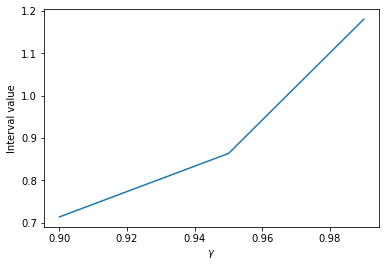

In [8]:
gamma = [0.9, 0.95, 0.99]
plt.plot(gamma, [interval[1] - interval[0] for interval in intervals])
plt.xlabel("$\gamma$")
plt.ylabel("Interval value")
plt.show()

5)Найти теоретическое значение дисперсии случайной величины по известной плотности распределения

$$D[X] = M[X^2] - M^2[X] = \int_{-(4)^{(1/3)}}^{(2)^{(1/3)}} {(x^4)/2}dx - \big{(}\int_{-(4)^{(1/3)}}^{(2)^{(1/3)}} {(x^3)/2}dx\big{)}^2$$

In [9]:
Disp_teor = integrate.quad(lambda x: (x ** 4)/2, -(4)**(1/3), 2**(1/3))[0] - \
(integrate.quad(lambda x: (x ** 3)/2, -(4)**(1/3), 2**(1/3)))[0]**2 
print("D = ", Disp_teor)

D =  1.0962439596140896


1.6. Найдем доверительный интервал для оценки математического ожидания случайной величины при известной дисперсии для различных уровней значимости:

In [10]:
intervals2 = []
for i in t_g:
    intervals2.append((MO - np.sqrt(Disp_teor) * i / np.sqrt(n - 1), MO + np.sqrt(Disp_teor) * i / np.sqrt(n - 1)))
print(intervals2)

[(-1.2531480995944864, -0.42204882162723545), (-1.3403414631500103, -0.3348554580717117), (-1.5248166786063249, -0.15038024261539695)]


1.7. Построить график зависимости величины доверительного интервала от уровня значимости:

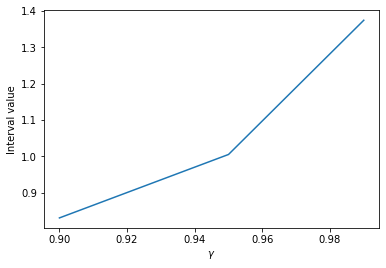

In [11]:
plt.plot(gamma, [interval[1] - interval[0] for interval in intervals2])
plt.xlabel("$\gamma$")
plt.ylabel("Interval value")
plt.show()

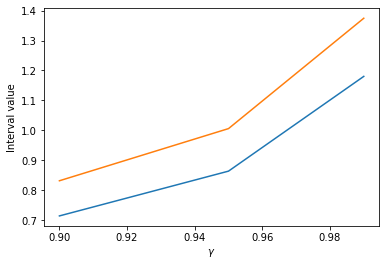

In [12]:
plt.plot(gamma, [interval[1] - interval[0] for interval in intervals])
plt.plot(gamma, [interval[1] - interval[0] for interval in intervals2])
plt.xlabel("$\gamma$")
plt.ylabel("Interval value")
plt.show()

1.9. Повторим п.п. 1.2 – 1.8. для различного объема выборки: n = 30, 50, 70, 100, 150.

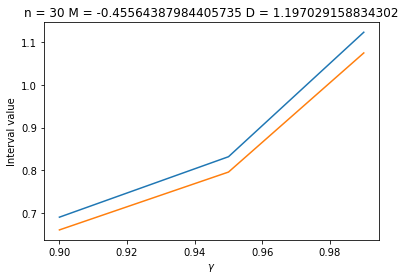

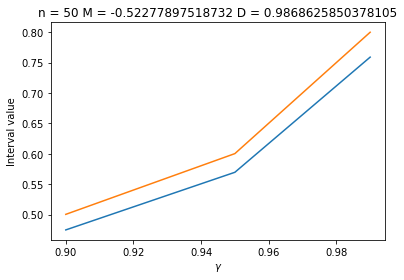

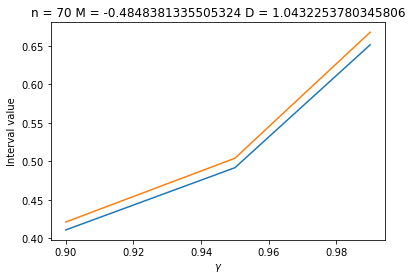

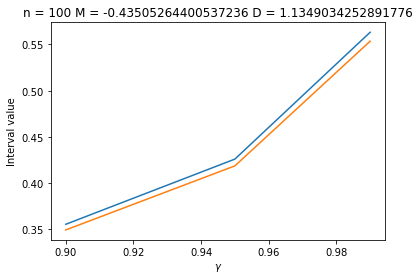

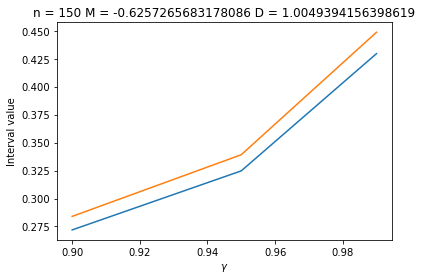

In [13]:
N = [30, 50, 70, 100, 150]
all_intervals = []
for n in N:
    X = []
    Y = []
    # Формируем однородную непрерывную случайную величину.
    random_variable = sts.uniform()
    # Генерируем случайные числа
    xi = random_variable.rvs(size=n)
    # X_i = e_i(b - a) + a
    for i in range(n):
        x = xi[i] * (b - a) + a
        X.append(x)
        if x < 0:
            y = - (abs(x))**(1/3)
        else:
            y = x**(1/3)
        Y.append(y)
    MO = sum(Y) / n
    Disp = 0.
    for i in Y:
        Disp += (i - MO) ** 2
    Disp = Disp / (n - 1)

    t_rv = sts.t(n-1)
    arr = t_rv.rvs(1000000)
    t_g = []
    for i in gamma:
        tmp = sts.mstats.mquantiles(arr, prob=[1-(1-i)/2])
        t_g.append(tmp[0])
 
    intervals = []
    for t in t_g:
        intervals.append((MO - np.sqrt(Disp) * t / np.sqrt(n - 1), MO + np.sqrt(Disp) * t / np.sqrt(n - 1)))
    intervals2 = []
    for i in t_g:
        intervals2.append((MO - np.sqrt(Disp_teor) * i / np.sqrt(n - 1), MO + np.sqrt(Disp_teor) * i / np.sqrt(n - 1)))
    all_intervals.append(intervals2)
    str = "n = " + n.__str__()+ " M = " + MO.__str__() + " D = " + Disp.__str__()
    plt.title(str)
    plt.plot(gamma, [interval[1] - interval[0] for interval in intervals])
    plt.plot(gamma, [interval[1] - interval[0] for interval in intervals2])
    plt.xlabel("$\gamma$")
    plt.ylabel("Interval value")
    plt.show()

10) Построим графики зависимости величины доверительного интервала от объема выборки

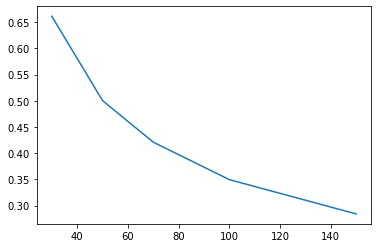

In [14]:
# для уровня 0.9
plt.plot(N, [(interv[0][1] - interv[0][0]) for interv in all_intervals])

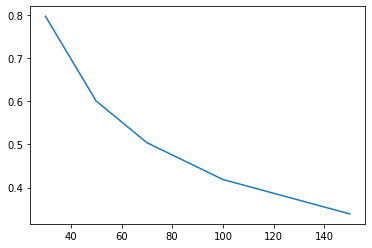

In [15]:
# для уровня 0.95
plt.plot(N, [(interv[1][1] - interv[1][0]) for interv in all_intervals])

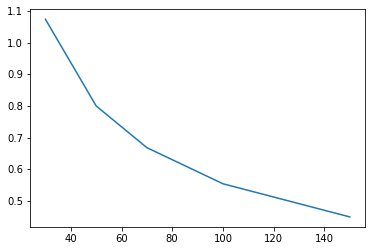

In [16]:
# для уровня 0.99
plt.plot(N, [(interv[2][1] - interv[2][0]) for interv in all_intervals])

Задание2

In [17]:
n = 20
X = []
Y = []
# Формируем однородную непрерывную случайную величину.
random_variable = sts.uniform()
# Генерируем случайные числа
xi = random_variable.rvs(size=n)
# X_i = e_i(b - a) + a
for i in range(n):
    x = xi[i] * (b - a) + a
    X.append(x)
    if x < 0:
        y = - (abs(x))**(1/3)
    else:
        y = x**(1/3)
    Y.append(y)
print(Y)

[-1.1448325488045499, -0.9213170889033201, -0.7512839743693324, -1.0106215073267752, 1.0994640450508655, -0.6618581209484443, -0.879756468059539, 1.1954930636267036, 1.2597206785128343, 0.9650002355800354, -1.2007997141640405, 1.2360194112104046, -1.5561622451879566, 0.5428510920707034, 0.46392977420828285, -1.497909448061228, -1.1087094276671126, -0.3573731100351537, 0.8955481090290216, -1.4431487914488068]


1-2)Найдем точечную оценку математического ожидания и дисперсии случайной величины

In [18]:
MO = sum(Y) / n
print("M = ", MO)
Disp = 0.
for i in Y:
    Disp += (i - MO) ** 2
Disp = Disp / (n - 1)
print("D = ", Disp)

M =  -0.2437873017843703
D =  1.1216511598989793


3) Найдем доверительный интервал для оценки дисперсии случайной величины для различных уровней значимости

Уровни значимости $\gamma$ примем равными $0.9$, $0.95$, $0.99$

Получаем n-1=19 степеней свободы

$\chi^2_{\frac{1-\gamma}{2}, n-1}$ и $\chi^2_{\frac{1+\gamma}{2}, n-1}$: $\chi^2_{0.05, 19}=30.14353$ и $\chi^2_{0.95, 19}=10.11701, \chi^2_{0.025, 19}=32.85233$ и $\chi^2_{0.975, 19}=8.90652, \chi^2_{0.005, 19}=38.58226$ и $\chi^2_{0.995, 19}=6.84397$

In [19]:
xi_minus = [30.14353, 32.85233, 38.58226]
xi_plus = [10.11701, 8.90652, 6.84397]
intervals = []

for i in range(3):
    intervals.append(((n-1) * Disp / xi_minus[i], (n - 1) * Disp / xi_plus[i]))
print(intervals)

[(0.7069965607239964, 2.1064891739832823), (0.6487019958121876, 2.3927832686706596), (0.5523619414228355, 3.11389033529963)]


4) Построим график зависимости величины доверительного интервала от уровня значимости

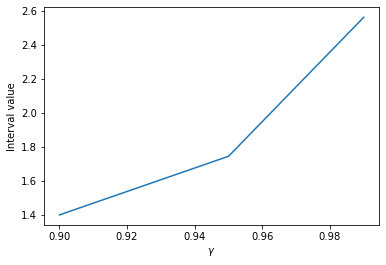

In [20]:
plt.plot(gamma, [interval[1] - interval[0] for interval in intervals])
plt.xlabel("$\gamma$")
plt.ylabel("Interval value")
plt.show()

5) Найдем теоретическое значение математического ожидания случайной величины по известной плотности распределения

In [21]:
MO_teor = integrate.quad(lambda x: (x ** 3)/2, -(4)**(1/3), 2**(1/3))[0]
print("M = ", MO_teor)

M =  -0.4787202635103814


6) Найдем доверительный интервал для оценки дисперсии случайной величины при известном математическом ожидании для различных уровней значимости

In [22]:
Disp = 0.
for i in Y:
    Disp += (i - MO_teor) ** 2
Disp = Disp / (n - 1)
print("D = ", Disp)

D =  1.1797495772730378


In [23]:
intervals2 = []

for i in range(3):
    intervals2.append((n * Disp / xi_minus[i], n * Disp / xi_plus[i]))
print(intervals2)

[(0.7827547584991126, 2.332209965736987), (0.71821364102518, 2.6491818965724834), (0.6115502706544602, 3.4475591718638094)]


7. Построим график зависимости величины доверительного интервала от уровня значимости

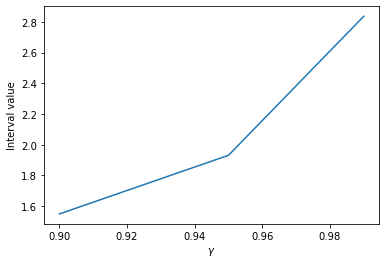

In [24]:
plt.plot(gamma, [interval[1] - interval[0] for interval in intervals2])
plt.xlabel("$\gamma$")
plt.ylabel("Interval value")
plt.show()

8) Сравним результаты, полученные по п.п. 4, 7

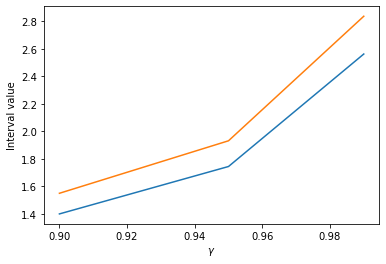

In [25]:
plt.plot(gamma, [interval[1] - interval[0] for interval in intervals])
plt.plot(gamma, [interval[1] - interval[0] for interval in intervals2])
plt.xlabel("$\gamma$")
plt.ylabel("Interval value")
plt.show()


[(0.9729173331873802, 2.333344726435258), (0.9061370519779194, 2.5791403757813183), (0.7975684661019725, 3.1737294740974336)]


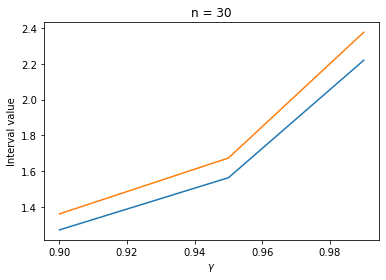

[(0.8009736415296019, 1.5606321306141544), (0.7564662567901256, 1.676602392131111), (0.6779391572856874, 1.9504957326524992)]


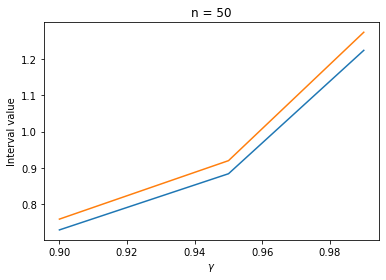

[(0.8790484823065637, 1.5461750103015721), (0.8372646512748473, 1.6411638800719701), (0.7608442820661759, 1.8462343702881934)]


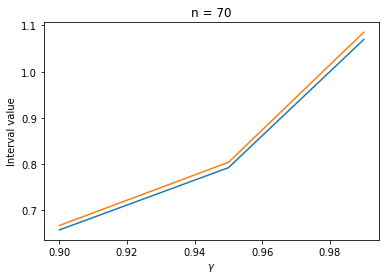

[(0.9837468588455727, 1.5704242453761192), (0.9446393062395257, 1.6518685865554141), (0.8726547779740538, 1.8281745511965732)]


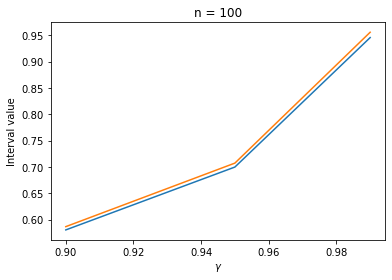

[(0.950133077226894, 1.3925566463046806), (0.9182447947472675, 1.4476565024021717), (0.8602312360255235, 1.5687297466258607)]


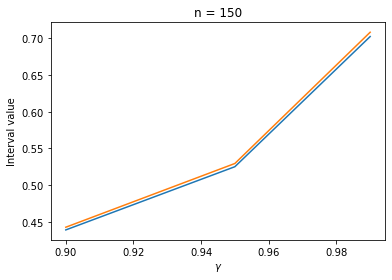

In [26]:
N = [30, 50, 70, 100, 150]
all_intervals = []
for n in N:
    X = []
    Y = []
    # Формируем однородную непрерывную случайную величину.
    random_variable = sts.uniform()
    # Генерируем случайные числа
    xi = random_variable.rvs(size=n)
    # X_i = e_i(b - a) + a
    for i in range(n):
        x = xi[i] * (b - a) + a
        X.append(x)
        if x < 0:
            y = - (abs(x))**(1/3)
        else:
            y = x**(1/3)
        Y.append(y)
    MO = sum(Y) / n
    Disp = 0.
    for i in Y:
        Disp += (i - MO) ** 2
    Disp = Disp / (n - 1)
#     вычисляем хи
    chi_mass = sts.chi2(n - 1)
    array = chi_mass.rvs(100000)
    xi_plus = []
    xi_minus = []
    for i in gamma:
        temp = sts.mstats.mquantiles(array, prob=[(1-i)/2, (1+i)/2])
        xi_plus.append(temp[0])
        xi_minus.append(temp[1])
        
    intervals = []
    for i in range(3):
        intervals.append(((n-1) * Disp / xi_minus[i], (n - 1) * Disp / xi_plus[i]))
    Disp2 = 0.
    for i in Y:
        Disp2 += (i - MO_teor) ** 2
    Disp2 = Disp2 / (n - 1)
    intervals2 = []
    for i in range(3):
        intervals2.append((n * Disp2 / xi_minus[i], n * Disp2 / xi_plus[i]))
    all_intervals.append(intervals2)
    print(intervals2)
    str = "n = " + n.__str__()
    plt.title(str)
    plt.plot(gamma, [interval[1] - interval[0] for interval in intervals])
    plt.plot(gamma, [interval[1] - interval[0] for interval in intervals2])
    plt.xlabel("$\gamma$")
    plt.ylabel("Interval value")
    plt.show()

10) Построим графики зависимости величины доверительного интервала от объема выборки

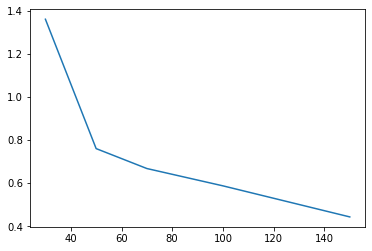

In [27]:
# для уровня 0.9
plt.plot(N, [(interv[0][1] - interv[0][0]) for interv in all_intervals])

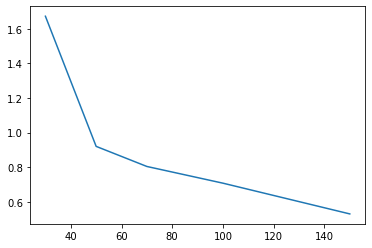

In [28]:
# для уровня 0.95
plt.plot(N, [(interv[1][1] - interv[1][0]) for interv in all_intervals])

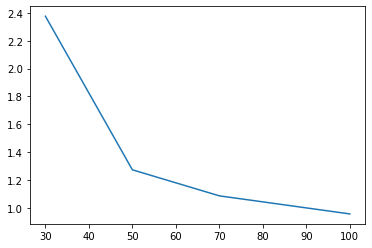

In [29]:
# для уровня 0.99
plt.plot(N[:-1], [(interv[-1][1] - interv[-1][0]) for interv in all_intervals[:-1]])